<h2><b><font color="blue">Linear Regression</font></b></h2>
<p style="text-align: justify;">Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. There are simple linear regression calculators that use a “least squares” method to discover the best-fit line for a set of paired data. You then estimate the value of X (dependent variable) from Y (independent variable).</p>
<p><b>Characteristic Equation <font color="red">y = m<sub>1</sub>x<sub>1</sub> + m<sub>2</sub>x<sub>2</sub> + ... + m<sub>n</sub>x<sub>n</sub> + c</font></b></p>
<p>Where, m<sub>1</sub>, m<sub>2</sub>, ..., m<sub>n</sub> are the coefficients<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c is intercept<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>n</sub> are independent variables<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;y is dependent variable</p>

<h3>Step 1: Data Collection</h3>

In [1]:
import pandas as pd
df = pd.read_csv("datasets/salary.csv")
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


<h3>Step 2: Data Preprocessing</h3>

In [2]:
# check whether any null value presents in the dataset or not
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<h3>Step 3: Feature Selection</h3>

In [3]:
y = df.iloc[:, 1]
X = df.iloc[:, 0]
print(X, y, sep='\n\n')

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
30    11.2
31    11.5
32    12.3
33    12.9
34    13.5
Name: YearsExperience, dtype: float64

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
30    127345
31    126756
32    128765
33    135675
34    139465
Name: Salary, dtype: int64


In [4]:
# reshape the array using numpy
import numpy as np
X = np.reshape(np.array(X), (-1, 1))
y = np.reshape(np.array(y), (-1, 1))

<h3>Step 4: Model Training and Testing</h3>

In [5]:
# split your dataset into the train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
# train your model using the training dataset and check the score of the model and other parameters
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
# check the score of the linear regression model
print(lr.score(X_test, y_test))

0.9646561504474246


<h3>Step 5: Model Evaluation</h3>

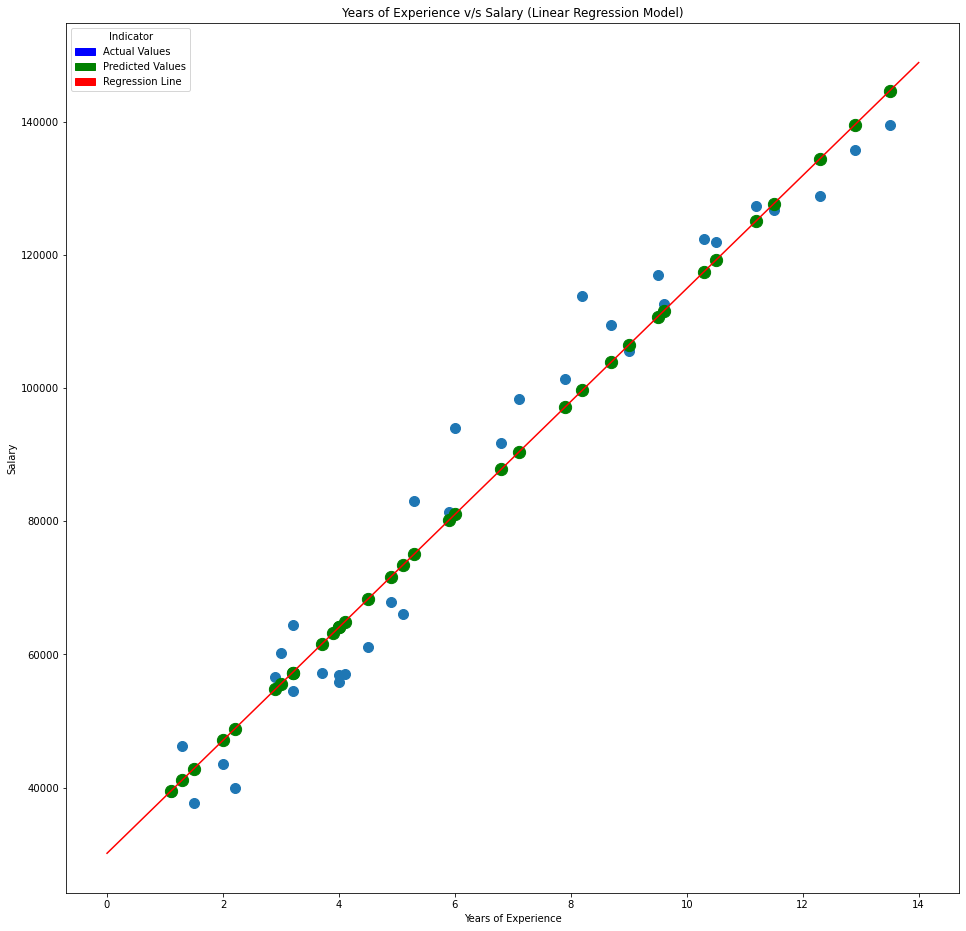

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = (16, 16)
plt.scatter(X, y, s=100)
x_values = [i for i in range(15)]
y_values = [lr.coef_[0] * x + lr.intercept_[0] for x in x_values]
plt.plot(x_values, y_values, c='red')
plt.scatter(X, lr.predict(X), c="green", s=150)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience v/s Salary (Linear Regression Model)")
blue_patches = mpatches.Patch(color="blue", label="Actual Values")
green_patches = mpatches.Patch(color="green", label="Predicted Values")
red_patches = mpatches.Patch(color="red", label="Regression Line")
plt.legend(handles=[blue_patches, green_patches, red_patches], title="Indicator")
plt.savefig("images/regression_analysis.png", dpi=100)

<h3>Step 6: Loss Function or cost function evaluation</h3>
<p>For Linear Regression we use Mean Squared Error (MSE) as cost function</p>
<p><b>Mean Squared Error Formula: <font color="red">(1/N) &sum; (y<sub>actual</sub> - y<sub>predicted</sub>)<sup>2</sup></font></b></p>

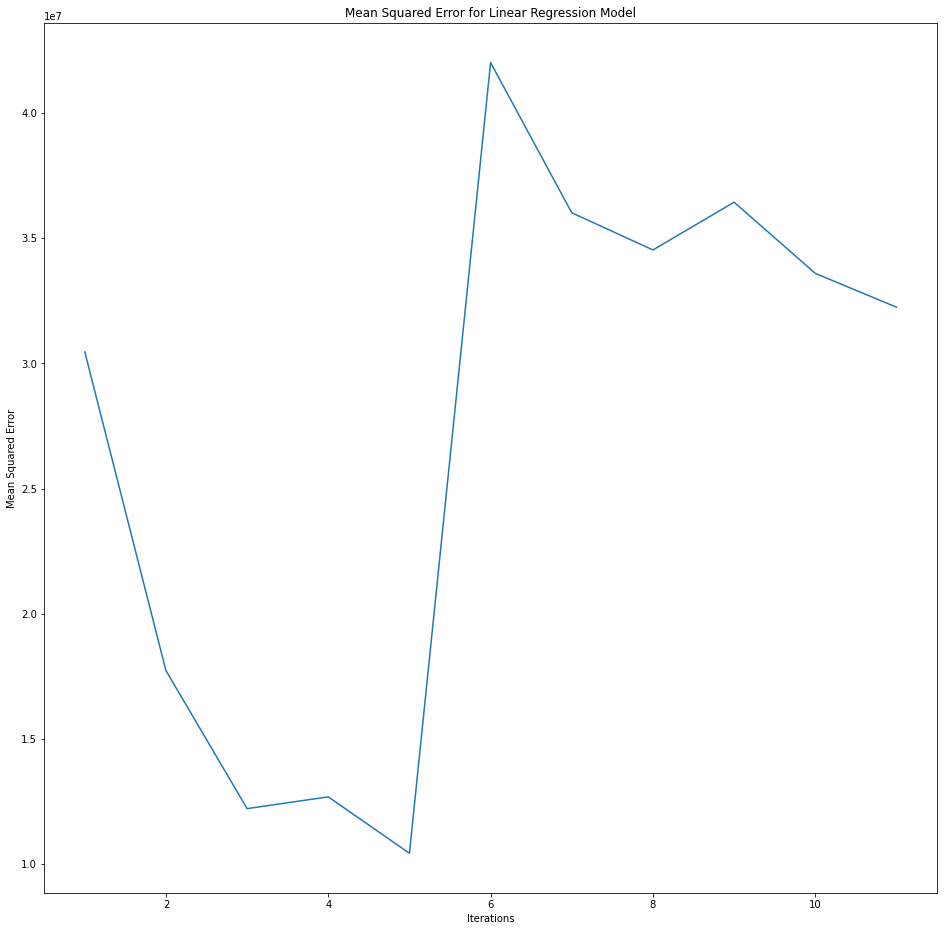

In [9]:
y_predicted = lr.predict(X_test)
se = []
for i in range(len(y_predicted)):
    se.append((y_predicted[i][0] - y_test[i][0]) ** 2)
mse = []
for i in range(len(se)):
    mse.append(sum(se[:(i + 1)])/(i + 1))
plt.title("Mean Squared Error for Linear Regression Model")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.plot([i + 1 for i in range(len(se))], mse)
plt.savefig("images/mean_squared_error.png", dpi=100)

<h3>Step 7: Model saving</h3>

In [10]:
import joblib
joblib.dump(lr, "models/linear_regression_model")
print("Model saved successfully...")

Model saved successfully...
